# 8 February 2021

# Import Libraries

In [69]:
# Basic Operations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler  

# Model
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [70]:
data = pd.read_csv('hotel_bookings.csv')

In [71]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [72]:
# Slicing data to be only 5000 first rows
df = data[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

df = df.iloc[:5000, :]

In [73]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [75]:
# Check null value of each feature

df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

There are 2 missing values in 'country' feature.

# A. Exploratory Data Analysis (EDA)

Setelah menyesuaikan ukuran data dan variable sesuai instruksi, selanjutnya akan dilakukan EDA (salah satunya melalui visualisasi) untuk mendapatkan insight dari dataset ini.

In [76]:
# Proportion of canceled and not cancelled
df['is_canceled'].value_counts()/df.shape[0]*100

0    54.04
1    45.96
Name: is_canceled, dtype: float64

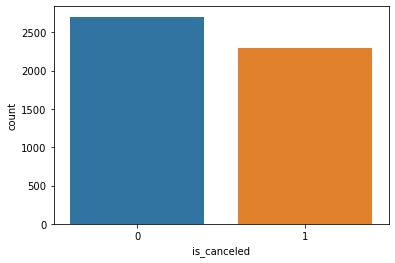

In [77]:
sns.countplot(x = 'is_canceled', data=df);

The proportion of not cancelled booking is higher. From the total of 5000 bookings, there are 2702 of not cancelled booking and 2298 otherwise.

### Separating numerical features and categorical features

In [78]:
num_features = [i for i in df.columns[df.dtypes != 'object']]

In [79]:
cat_features = [i for i in df.columns[df.dtypes == 'object']]

In [80]:
num_features

['is_canceled',
 'adults',
 'children',
 'babies',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [81]:
cat_features

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

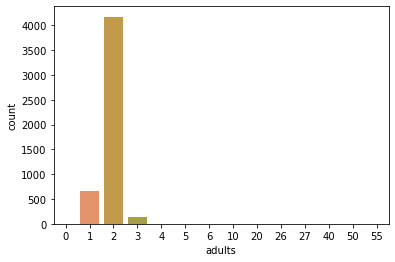

In [82]:
# Adults
sns.countplot(x = 'adults', data=df);

Jumlah pengunjung dewasa terbanyak adalah 2 orang. Jumlahnya sangat signifikan dibandingkan dengan jumlah adults lainnya. Dapat dikatakan, mayoritas pengunjung hotel ini adalah pasangan orang dewasa. 

In [83]:
# See the number of adults that brings children or babies
df.groupby(['adults'])['children', 'babies'].mean()

,children,babies
adults,,
0,0.000000,0.000000
1,0.024465,0.001529
2,0.127186,0.017485
3,0.212329,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
10,0.000000,0.000000
20,0.000000,0.000000


Dari data tabel di atas, dapat disimpulkan bahwa rata-rata jumlah pengunjung dewasa terbanyak yang membawa anak-anak adalah jumlah pengunjung dengan total 3 orang dewasa dan yang membawa bayi adalah 2 orang dewasa. Dapat disimpulkan bahwa yang membawa anak-anak atau bayi adalah pengunjung yang datang dengan keluarganya, bukan dari suatu rombongan/kelompok orang dewasa.

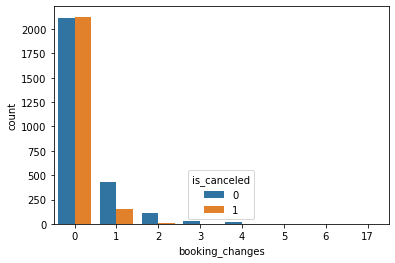

In [84]:
# Booking changes
sns.countplot(x = 'booking_changes', hue='is_canceled', data=df);

In [85]:
df.groupby('booking_changes')['is_canceled'].value_counts()

booking_changes  is_canceled
0                1              2126
                 0              2116
1                0               429
                 1               153
2                0               107
                 1                13
3                0                27
                 1                 4
4                0                16
                 1                 2
5                0                 4
6                0                 2
17               0                 1
Name: is_canceled, dtype: int64

Dari plot di atas, customer yang tidak pernah melakukan booking changes ternyata adalah customer yang paling sering melakukan cancel booking. Jumlah yang melakukan cancel booking pada kelas ini sedikit lebih tinggi dari yang tidak melakukan cancel booking.

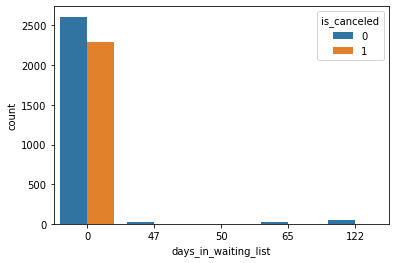

In [86]:
# Days in waiting list
sns.countplot(x = 'days_in_waiting_list', hue='is_canceled', data=df);

In [87]:
df.groupby('days_in_waiting_list')['is_canceled'].value_counts()

days_in_waiting_list  is_canceled
0                     0              2609
                      1              2296
47                    0                21
50                    0                 1
65                    0                19
122                   0                52
                      1                 2
Name: is_canceled, dtype: int64

Dari hasil plot di atas, ternyata yang paling banyak melakukan cancel booking adalah customer yang tidak masuk dalam daftar waiting list. Di lain sisi, customer yang masuk ke dalam waiting list selama 47, 50, dan 65 hari tidak ada yang melakukan cancel booking.

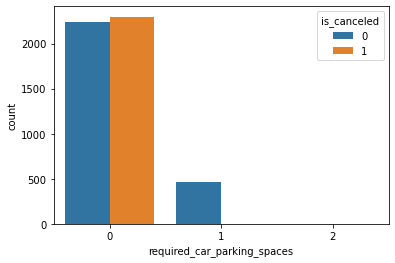

In [88]:
# Required car parking spaces
sns.countplot(x = 'required_car_parking_spaces', hue='is_canceled', data=df);

Dari plot di atas, customer yang tidak membutuhkan parking space untuk mobil adalah customer yang paling sering melakukan cancel booking.

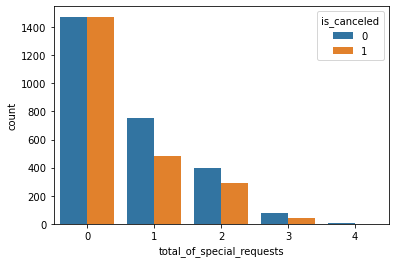

In [89]:
# Total of special requests
sns.countplot(x = 'total_of_special_requests', hue='is_canceled', data=df);

In [90]:
df.groupby('total_of_special_requests')['is_canceled'].value_counts()

total_of_special_requests  is_canceled
0                          1              1473
                           0              1470
1                          0               754
                           1               485
2                          0               396
                           1               294
3                          0                77
                           1                44
4                          0                 5
                           1                 2
Name: is_canceled, dtype: int64

Dari plot di atas, customer yang tidak meminta special request sama sekali adalah customer yang paling banyak melakukan cancel booking. Jumlahnya pun melebihi yang tidak melakukan cancel booking. Lain halnya dengan customer dengan jumlah special requests 1, 2, 3, dan 4, jumlah yang melakukan cancel booking lebih sedikit dari yang tidak cancel booking.

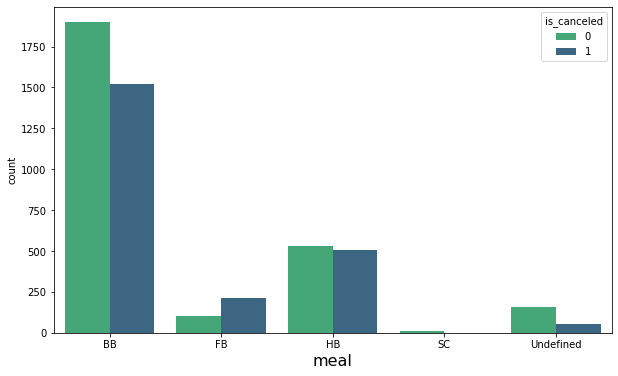

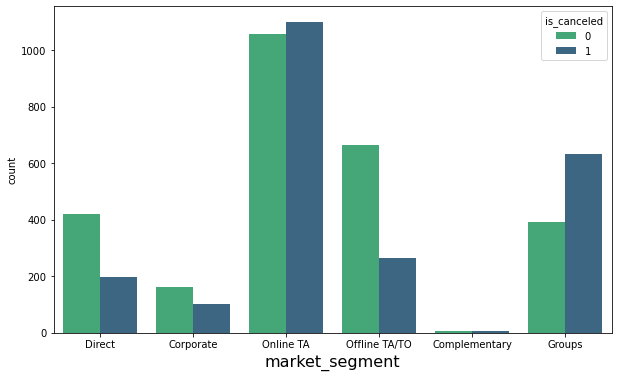

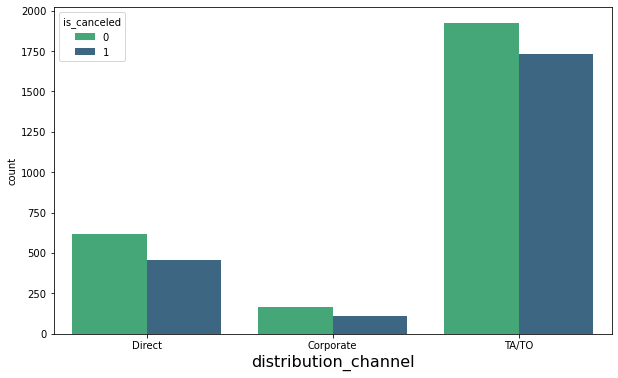

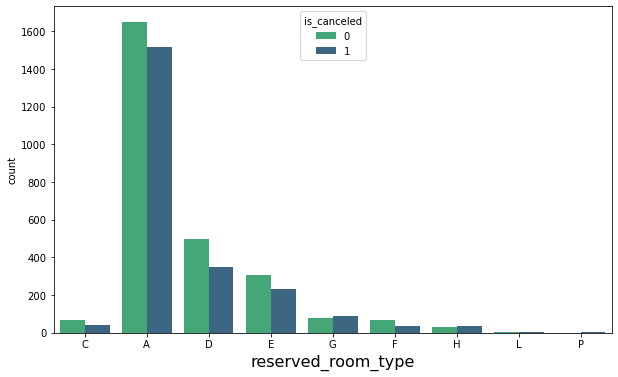

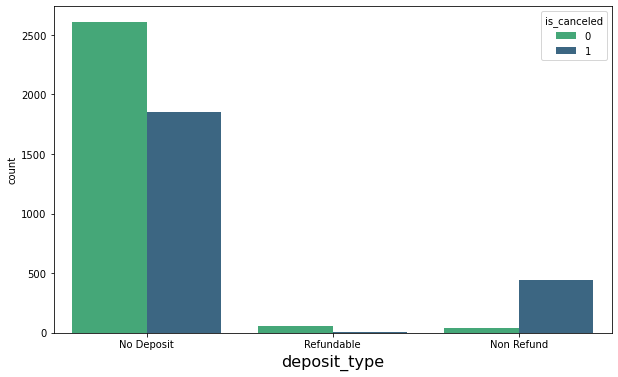

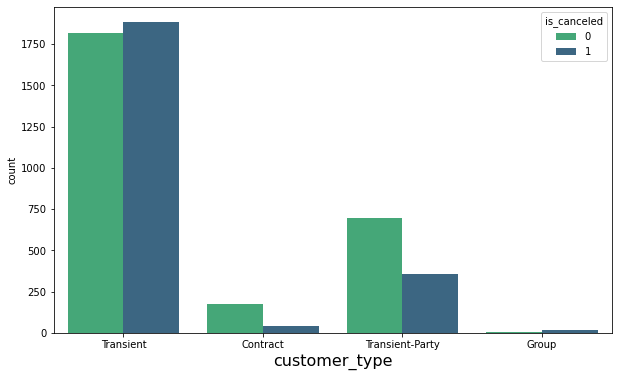

In [91]:
exclude = ['hotel', 'country']

for features in cat_features:
    if features not in exclude:
        plt.figure(figsize = (10, 6))
        ax = sns.countplot(x = features, data = df, hue = 'is_canceled', palette = 'viridis_r')
            
        plt.xlabel(features, fontsize = 16);

### Categorical features plots interpretation:

1. Jumlah jenis meal yang paling banyak dipesan adalah BB (Bed & Breakfast), dan yang paling sedikit adalah SC.

2. Online TA adalah market segment terbanyak dengan total 2156 bookings. Akan tetapi, jumlah booking cancellationnya lebih banyak dari yang tidak cancel, mencapai 1100 bookings cancellation. Selain itu, rasio market segment groups yang melakukan cancel booking, jauh lebih banyak dari yang tidak cancel booking. Di lain sisi, complementary menjadi market segment yang paling sedikit.

3. Sejalan dengan market segment, distribution channel terbesar adalah melalui TA/TO. Perbedaan jumlahnya dengan distribution channel lainnya sangat signifikan. 

4. Pada feature reserved_room_type, room type A menjadi yang terbanyak dipilih customer, mencapai 3167 bookings. Akan tetapi, customer yang memilih tipe room ini banyak juga yang melakukan cancel booking. 

5. Dari total 5000 bookings, sebanyak 4461 bookings tidak menyimpan deposit.

6. Customer type transient menjadi yang terbanyak, mencapai 3699. Namun, tipe customer ini pulalah yang melakukan bokking cancellation terbanyak.

In [92]:
df.groupby('country')['is_canceled'].count().sort_values(ascending=False).head()

country
PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
Name: is_canceled, dtype: int64

5 Negara dengan pengunjung hotel terbanyak adalah PRT, ESP, GBR, IRL dan FRA. Jumlah pengunjung yang berasal dari PRT hampir 6 kali lipat lebih banyak dibandingkan ESP yang menempati posisi kedua terbanyak. Hal ini menjadi maklum karena hotel pada dataset ini berlokasi di Portugal.

In [93]:
df['market_segment'].value_counts()

Online TA        2156
Groups           1025
Offline TA/TO     929
Direct            618
Corporate         261
Complementary      11
Name: market_segment, dtype: int64

In [94]:
# More analysis for meal feature
x = df[['market_segment', 'meal']]
for i in x.meal.unique():
    x[i] = x['meal'].apply(lambda x : 1 if i == x else 0)
x.groupby(['market_segment']).sum()

,BB,FB,HB,SC,Undefined
market_segment,,,,,
Complementary,8,2,1,0,0
Corporate,254,0,4,3,0
Direct,477,20,119,2,0
Groups,271,276,315,5,158
Offline TA/TO,556,21,295,3,54
Online TA,1852,0,303,1,0


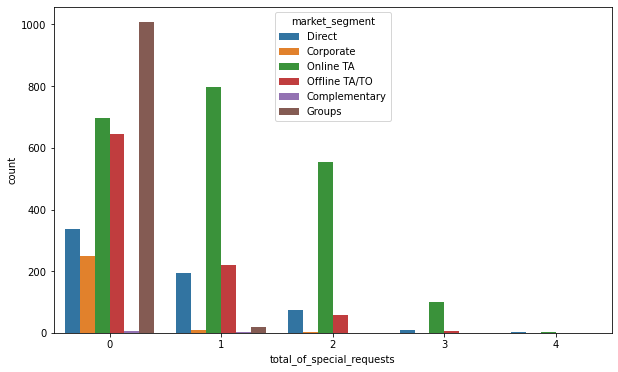

In [95]:
# total of special request vs market segment
plt.figure(figsize=(10, 6))
sns.countplot(x = 'total_of_special_requests', hue='market_segment', data=df);

Dari tabel dan plot di atas, dapat dilihat bahwa Online TA adalah market segment dengan pemesan meal packages terbanyak. Dengan rincian, yang memesan meal tipe BB (Bed & Breakfast) mendominasi tipe lainnya. Pada market segment Online TA, tidak ada yang memesan meal tipe FB dan juga tidak ada yang tidak memesan meal sama sekali.

Di lain sisi, market segment Groups dan Offline TA/TO adalah market segment yang paling banyak tidak memesan meal packages ketika melakukan booking di hotel ini.

Market segment Online TA pun menjadi yang paling banyak meminta special requests dibandingkan market segment lainnya, meskipun banyak juga yang tidak meminta special requests apapun. 

## Insight according to EDA

Dari 5000 data dan banyaknya features yang sudah dianalisis, dapat disimpulkan bahwa mayoritas customer hotel ini melakukan booking melalui Online TA (Travel Agents). Namun, market segment ini pulalah yang paling sering melakukan cancel booking. Hal ini mungkin disebabkan oleh mudahnya melakukan cancel booking secara online.

Jika dilihat dari market segment lainnya, jumlah customer yang melakukan booking untuk hotel ini banyak juga yang berasal dari booking secara langsung ke pihak hotel (Direct) dan juga melalui Offline TA/TO. Kedua market segment ini memiliki rasio yang jauh lebih kecil untuk customer yang melakukan cancel booking. 

Dengan kata lain, pihak manajemen hotel bisa melakukan promosi yang lebih gencar untuk dapat menarik customer agar dapat melakukan booking langsung ke pihak hotel. Selain itu, pihak manajemen hotel pun sebaiknya meningkatkan kerjasamanya dengan para Offline Travel Agents dan Tour Operator lainnya, agar dapat lebih meningkatkan jumlah booking (dan mengurangi yang cancel booking) untuk hotel ini.

# B. Data Cleaning & Preprocessing

### Handling missing value in 'country' feature

To handle two missing values in this feature, I decided to just simply fill it with the most frequent value (mode) in this feature, which is PRT.

In [96]:
# Filling missing values in 'country' column with its mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [97]:
df['country'].value_counts().sort_values(ascending=False).head()

PRT    3176
ESP     550
GBR     505
IRL     172
FRA     113
Name: country, dtype: int64

In [98]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

### Outliers Identification

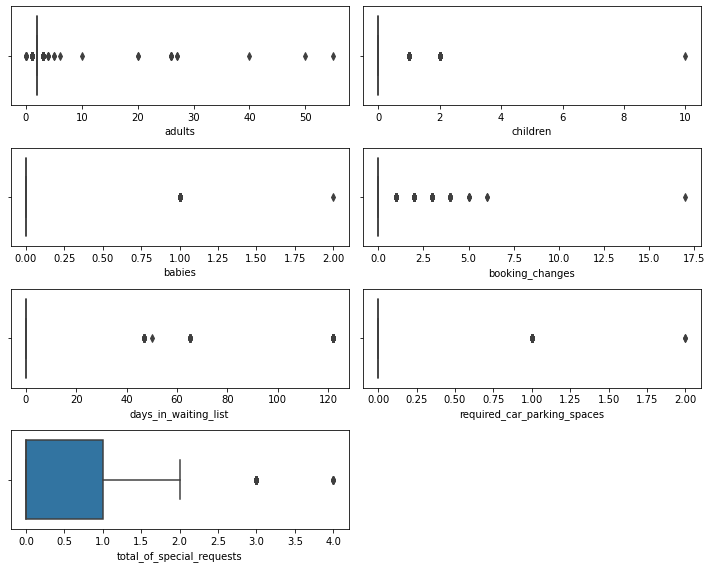

In [106]:
# Checking outliers in continuous variable
features = [
 'adults',
 'children',
 'babies',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']
n = 1
plt.figure(figsize=(10,8))
for feature in features:
    plt.subplot(4,2,n)
    sns.boxplot(df[feature])
    n+=1
    plt.tight_layout()

In [111]:
from numpy import percentile

def outliers():
    features = [
                'adults',
                'children',
                'babies',
                'booking_changes',
                'days_in_waiting_list',
                'required_car_parking_spaces',
                'total_of_special_requests']
    
    for i in features:
        # calculate interquartile range
        q25, q75 = percentile(df[i], 25), percentile(df[i], 75)
        iqr = q75 - q25
        print(f'Percentiles {i}: 25th = {q25}, 75th = {q75}, IQR = {iqr}')

        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # identify outliers
        outliers = [x for x in df[i] if x < lower or x > upper]
        print(f'Identified outliers in {i}: {len(outliers)}')
        print()

In [112]:
outliers()

Percentiles adults: 25th = 2.0, 75th = 2.0, IQR = 0.0
Identified outliers in adults: 825

Percentiles children: 25th = 0.0, 75th = 0.0, IQR = 0.0
Identified outliers in children: 375

Percentiles babies: 25th = 0.0, 75th = 0.0, IQR = 0.0
Identified outliers in babies: 73

Percentiles booking_changes: 25th = 0.0, 75th = 0.0, IQR = 0.0
Identified outliers in booking_changes: 758

Percentiles days_in_waiting_list: 25th = 0.0, 75th = 0.0, IQR = 0.0
Identified outliers in days_in_waiting_list: 95

Percentiles required_car_parking_spaces: 25th = 0.0, 75th = 0.0, IQR = 0.0
Identified outliers in required_car_parking_spaces: 467

Percentiles total_of_special_requests: 25th = 0.0, 75th = 1.0, IQR = 1.0
Identified outliers in total_of_special_requests: 128



### Outliers interpretation:

Dari hasil pengecekan data outliers pada numerical features dengan menggunakan metode IQR, dapat dilihat bahwa semua numerical features memiliki outliers. Namun, saya memilih untuk tidak melakukan treatment apapun pada semua data outliers ini menimbang semua range datanya masih masuk di akal jika ditinjau berdasarkan domain knowledge.

## Feature Selection

In [116]:
# Membuat df sementara untuk pengujian feature selection
df_feat = df.copy()

In [118]:
# Melakukan encoding sementara untuk categorical features dengan menggunakan LabelEncoder
from sklearn import preprocessing

labelencoder= preprocessing.LabelEncoder()
df_feat['hotel']=labelencoder.fit_transform(df_feat['hotel'])
df_feat['meal']=labelencoder.fit_transform(df_feat['meal'])
df_feat['country']=labelencoder.fit_transform(df_feat['country'])
df_feat['market_segment']=labelencoder.fit_transform(df_feat['market_segment'])
df_feat['distribution_channel']=labelencoder.fit_transform(df_feat['distribution_channel'])
df_feat['reserved_room_type']=labelencoder.fit_transform(df_feat['reserved_room_type'])
df_feat['deposit_type']=labelencoder.fit_transform(df_feat['deposit_type'])
df_feat['customer_type']=labelencoder.fit_transform(df_feat['customer_type'])

In [120]:
X_feat = df_feat.drop(['is_canceled'], axis=1)
y_feat = df_feat['is_canceled']

In [123]:
# Mencari korelasi dengan ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X_feat, y_feat)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_feat.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.444975)
2. feature 13 (0.105319)
3. feature 10 (0.081058)
4. feature 12 (0.055876)
5. feature 6 (0.052786)
6. feature 9 (0.044450)
7. feature 8 (0.042336)
8. feature 1 (0.039221)
9. feature 4 (0.037760)
10. feature 14 (0.036690)
11. feature 7 (0.023596)
12. feature 11 (0.017889)
13. feature 2 (0.013789)
14. feature 3 (0.004255)
15. feature 0 (0.000000)


Dari hasil features ranking berdasarkan ExtraTreesClassifier, dapat dilihat urutan feature seperti di bawah ini, dari mulai yang paling relevant hingga irrelevant terhadap target label ('is_canceled'):

Feature ranking:

1. feature 5 (0.444975)		country
2. feature 13 (0.105319)	required_car_parking_spaces
3. feature 10 (0.081058)	deposit_type
4. feature 12 (0.055876)	customer_type
5. feature 6 (0.052786)		market_segment
6. feature 9 (0.044450)		booking_changes
7. feature 8 (0.042336)		reserved_room_type
8. feature 1 (0.039221)		adults
9. feature 4 (0.037760)		meal
10. feature 14 (0.036690)	total_of_special_requests
11. feature 7 (0.023596)	distribution_channel
12. feature 11 (0.017889)	days_in_waiting_list
13. feature 2 (0.013789)	children
14. feature 3 (0.004255)	babies
15. feature 0 (0.000000)	hotel

In [124]:
# Hasil korelasi menggunakan .corr()
correlation = df_feat.corr()["is_canceled"]
correlation.sort_values(ascending=False)[1:]

country                        0.525207
deposit_type                   0.197458
market_segment                 0.059106
distribution_channel           0.047328
adults                         0.045200
children                       0.024678
customer_type                 -0.009799
meal                          -0.019277
reserved_room_type            -0.025465
babies                        -0.029543
total_of_special_requests     -0.083072
days_in_waiting_list          -0.113426
booking_changes               -0.181608
required_car_parking_spaces   -0.295316
hotel                               NaN
Name: is_canceled, dtype: float64

Dari hasil 2 metode untuk feature selection yang sudah dilakukan di atas, saya putuskan untuk tetap memasukkan semua features sebagai input model. Akan tetapi, feature 'hotel' akan saya drop terlebih dahulu karena dalam slicing 5000 data ini, hanya ada satu jenis hotel, yaitu resort hotel. Oleh karena itu, feature ini saya rasa tidak relevan dengan target label.

In [129]:
# Drop 'hotel' feature
df = df.drop(['hotel'], axis=1)

In [130]:
df

,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


## Transformer Pipeline

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  5000 non-null   int64  
 1   adults                       5000 non-null   int64  
 2   children                     5000 non-null   float64
 3   babies                       5000 non-null   int64  
 4   meal                         5000 non-null   object 
 5   country                      5000 non-null   object 
 6   market_segment               5000 non-null   object 
 7   distribution_channel         5000 non-null   object 
 8   reserved_room_type           5000 non-null   object 
 9   booking_changes              5000 non-null   int64  
 10  deposit_type                 5000 non-null   object 
 11  days_in_waiting_list         5000 non-null   int64  
 12  customer_type                5000 non-null   object 
 13  required_car_parki

### Encoding scheme

1. adults: pass
2. children: pass
3. babies: pass
4. meal: OneHot Encoding
5. country: Label Encoding
6. market_segment: OneHot Encoding
7. distribution_channel: OneHot Encoding
8. reserved_room_type: Binary Encoding
9. booking_changes: pass
10. deposit_type: OneHot Encoding
11. days_in_waiting_list: pass
12. customer_type: OneHot Encoding
13. required_car_parking_spaces: pass
14. total_of_special_requests: pass

Jadi, features yang harus di-encode terlebih dahulu dengan jenis encoder berbeda adalah:
    
    * meal 
    * country 
    * market_segment
    * distribution_channel
    * reserved_room_type
    * deposit_type 
    * customer_type

Features yang lain dimasukkan ke dalam passthrough karena sudah bisa digunakan untuk pemodelan.

Untuk encoding feature 'country', tidak dimasukkan ke dalam pipeline karena saat saya coba, selalu terjadi error. Jadi, saya putuskan untuk meng-encode-nya langsung ke dalam df.

In [139]:
# Encode feature 'country'
df['country'] = labelencoder.fit_transform(df['country'])

In [140]:
binary_encoder_pipeline = Pipeline([
    ('binary encoder', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'), ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']),
    ('binary encoder', binary_encoder_pipeline, ['reserved_room_type'])
], remainder='passthrough')

In [141]:
transformer.transformers

[('one hot encoder',
  OneHotEncoder(drop='first'),
  ['meal',
   'market_segment',
   'distribution_channel',
   'deposit_type',
   'customer_type']),
 ('binary encoder',
  Pipeline(steps=[('binary encoder', BinaryEncoder())]),
  ['reserved_room_type'])]

In [142]:
transformer.fit_transform(df)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Setelah diencode, feature 'country' menjadi memiliki range nilai yang cukup jauh dari features lainnya. Dengan rincian:

- count    5000.000000
- mean       35.896000
- std        10.664874
- min         0.000000
- 25%        24.000000
- 50%        43.000000
- 75%        43.000000
- max        55.000000

Oleh karena itu, saya putuskan untuk menormalisasi feature 'country' agar memiliki range data 0-1.

In [155]:
df['country'] = MinMaxScaler().fit_transform(df[['country']].values)

In [156]:
df['country'].describe()

count    5000.000000
mean        0.652655
std         0.193907
min         0.000000
25%         0.436364
50%         0.781818
75%         0.781818
max         1.000000
Name: country, dtype: float64

# C. Model Benchmark & Evaluation Metric

Untuk mencari model benchmark, terlebih dahulu akan dilakukan splitting data untuk mencegah adanya data leakage.

## Data Splitting

In [157]:
X = df.drop(columns = ['is_canceled'])
y = df[['is_canceled']]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2,
    stratify = y,
    random_state = 2021)

In [159]:
X_train.head()

,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
3379,2,0.0,0,FB,0.781818,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0
874,3,0.0,0,HB,0.781818,Offline TA/TO,TA/TO,E,0,No Deposit,0,Transient,1,1
3244,2,0.0,0,BB,0.745455,Online TA,TA/TO,D,0,No Deposit,0,Transient,0,2
1966,2,0.0,0,BB,0.509091,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
1152,2,0.0,0,BB,0.781818,Corporate,Corporate,E,0,No Deposit,0,Transient,0,0


Setelah data splitting, selanjutnya akan dilakukan cross validation untuk memilih model benchmark.

Untuk model machine learning-nya sendiri, karena ini adalah problem klasifikasi, maka saya akan mencoba menggunakan 4 model, yaitu:

1. Logistic Regression: model ini menggunakan basis linear regression untuk mengatasi masalah klasifikasi. Bedanya, hasil perhitungan formulanya akan dimasukkan ke dalam interval kelas 0 dan 1.

2. K-Nearest Neighbors (KNN): model ini bekerja dengan mencari jarak antara query dan features pada data. Lalu, akan dipilih jumlah samples (K) yang terdekat dengan query, lalu voting dilakukan berdasarkan jumlah label terbanyak. 

3. Decision Tree: model ini bekerja dengan cara splitting node menjadi 2 atau lebih sub-nodes. Hasil splitting ini bertujuan untuk mendapatkan sub-nodes dengan tingkat homogenitas terbesar (sebagai contoh, bisa dipakai parameter 'gini'. Semakin kecil nilai 'gini', berarti semakin homogen datanya).

4. Random Forest: model ini menggunakan basis decision tree dan termasuk ke dalam ensemble model. Model ini menggabungkan banyak decision tree ke dalam satu model dengan tujuan untuk meningkatkan akurasi prediksi.

### Cross validation for choosing model benchmark

In [160]:
models = [
    ['Logistic Regression', LogisticRegression()],
    ['KNN', KNeighborsClassifier()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['Random Forest', RandomForestClassifier()]
]

### Jenis kesalahan dan pemilihan evaluation metric

Dalam pemodelan ML studi kasus ini, ada 2 jenis kesalahan yang mungkin terjadi, yaitu:

1. Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan (False Positive).

2. Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan) (False Negative).

Jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan adalah jenis kesalahan kedua, yaitu model memprediksi user tidak membatalkan pesanan, tapi realisasinya adalah sebaliknya. Hal ini jelas akan merugikan pihak hotel, karena kamar yang dicancel tersebut belum tentu dapat terisi oleh customer baru. Kalau kamar tidak terisi, berarti hotel tidak akan mendapatkan pemasukan.

Sebagai tambahan, jika ditinjau dari segi non-finansial, kesalahan pertama tentu ada konsekuensinya juga, yaitu pengaruh terhadap citra hotel karena user yang diprediksi membatalkan pesanan dan ternyata tidak membatalkan pesanan, tentu akan kecewa kalau ternyata kamar pesanannya sudah diisi oleh user lain. Hal ini dapat menyebabkan munculnya review buruk terhadap hotel. Namun, kesalahan pertama ini dapat diantisipasi dengan berbagai hal, salah satunya adalah dengan cara menghubungi user langsung (misalnya H-1) untuk memastikan apakah user tersebut akan membatalkan pesanannya atau tidak.

Oleh karena itu, saya putuskan untuk menggunakan metric f1_score agar dapat mengetahui keseimbangan antara recall dan precision score, serta jumlah FP dan FN dari model ML nya nanti.

In [161]:
def evaluate(models):
    model_name = []
    f1_score = []
    f1_std = []

    for name, model in models:
        estimator = Pipeline([('preprocess', transformer), ('model', model)])

        skfold = StratifiedKFold(n_splits=5)

        model_name.append(name)
        f1_score.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1').mean())
        f1_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1').std())

    return pd.DataFrame({
        'model': model_name,
        'f1_score': f1_score,
        'f1_std': f1_std
        })

In [162]:
evaluate(models)

,model,f1_score,f1_std
0,Logistic Regression,0.824781,0.005684
1,KNN,0.812814,0.023737
2,Decision Tree,0.850222,0.006900
3,Random Forest,0.859046,0.007695


Dari keempat model, model Random Forest dipilih sebagai model benchmark karena memiliki f1_score terbaik dengan nilai standard deviasi yang relatif rendah (model stabil). Untuk selanjutnya, hyperparameter tuning hanya diaplikasikan pada model Random Forest saja (karena waktu komputasi yang mungkin akan lama).

In [163]:
# Check benchmark performance against test data
estimator = Pipeline([('preprocess', transformer), ('model', RandomForestClassifier())])
estimator.fit(X_train, y_train)
f1_score(y_test, estimator.predict(X_test))

0.8634920634920635

# D. Hyperparameter Tuning

Model Benchmark (Before Tuning)

In [181]:
model = RandomForestClassifier()

estimator_rf = Pipeline([('transformer', transformer), ('model', model)])
estimator_rf.fit(X_train, y_train)

y_pred = estimator_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       540
           1       0.84      0.89      0.86       460

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



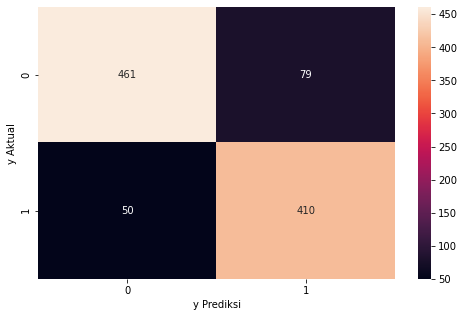

In [182]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

After Tuning

Untuk hyperparameter tuning, dicoba menggunakan grid search agar mendapatkan hasil yang lebih baik dan stabil (dibandingkan dengan randomizedsearch), karena Grid search akan mencoba semua kombinasi dari parameter yang telah didefine, sedangkan randomized search akan mencoba kombinasi tersebut secara random.

Parameter untuk tuning model Random Forest yang dipakai adalah:

1. n_estimators: jumlah trees di dalam forest. Semakin besar jumlahnya, maka waktu komputasinya pun akan semakin lama.

2. min_samples_leaf: jumlah minimal sample/data yang ada pada leaf node setelah node di-splitting.

3. min_samples_split: menentukan jumlah minimal sample/data pada node untuk keputusan lanjut split atau tidak. Defaultnya adalah 2, jadi, jika jumlah data pada node lebih dari 2, maka splitting akan terus dilakukan.

4. max_depth: parameter ini berarti total depth terjauh antara root node dengan leaf node. Sebagai contoh, jika max_depth = 3, maka tree akan splitting sebanyak 3 kali (memiliki 3 depth level). Parameter ini adalah salah satu parameter yang dapat mengontrol ukuran Tree.

5. model_criterion: parameter ini untuk mengukur kualitas split, terdiri dari 'gini' untuk Gini impurity dan 'entropy' untuk informtion gain. 

In [165]:
hyperparam_space = {
        'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1, 5, 10, 15, 20, 50],
        'model__min_samples_split' : [2, 5, 10, 15, 20, 50],
        'model__max_depth' : [2, 3, 4, 5, 6, 7],
        'model__criterion' : ['entropy', 'gini']}

In [166]:
estimator = Pipeline([('preprocess', transformer), ('model', RandomForestClassifier())])
skfold = StratifiedKFold(n_splits=5)

grid = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space, 
    cv = skfold, 
    scoring = 'f1')
    
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'c

In [167]:
grid.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 7,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 15,
 'model__n_estimators': 50}

In [168]:
grid.best_score_

0.8641123196812158

In [209]:
# Evaluate the best estimator to the test data

grid.best_estimator_.fit(X_train, y_train)
f1_score(y_test, grid.best_estimator_.predict(X_test))

0.8677354709418837

Terjadi sedikit peningkatan pada f1_score jika diaplikasikan pada test data, dari 0.8634920634920635 menjadi 0.8677354709418837.

In [176]:
y_pred = grid.best_estimator_.predict(X_test)

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       540
           1       0.81      0.93      0.86       460

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.87      0.86      0.87      1000



Berdasarkan classification report, terjadi penurunan precision score (0.03) dan peningkatan untuk recall score (0.03). Hasil f1_score tetap di 0.86.

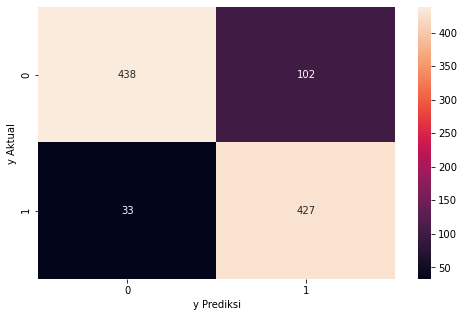

In [179]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

Setelah dilakukan hyperparameter tuning pada model Random Forest, ternyata f1_score after tuning sedikit lebih tinggi, meskipun perbedaannya dengan f1_score before tuning tidaklah terpaut jauh (sama-sama 0.86, beda mulai di desimal ketiga).

Selain itu, terjadi penurunan pada jumlah FN pada model setelah dilakukan hyperparameter tuning. Dari yang asalnya berjumlah 50, berubah menjadi 33. Namun, hal ini berdampak pada kenaikan jumlah FP, dari 79 menjadi 102.

Untuk langkah lebih lanjut guna mengimprovisasi model agar menghasilkan prediksi yang lebih baik, hal-hal yang dapat dilakukan adalah:

1. Melakukan komparasi 2 model terbaik dari hasil before tuning. Jadi, ada perbandingan lebih lanjut antara model-model tersebut ketika sudah dilakukan hyperparameter tuning.
2. Menambahkan atau mengganti parameter tuning.
3. Menambahkan jumlah data untuk dianalisis, karena semakin besar variasi data, maka bias terhadap target berdasarkan banyaknya features juga akan menurun.

# Save Model

In [184]:
# Save model

import pickle

estimator = Pipeline([('preprocess', transformer),('model', RandomForestClassifier())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Final_Model_Exam.sav', 'wb'))

In [185]:
# Save tuning result

import pickle

model_final = grid.best_estimator_.fit(X_train, y_train)

pickle.dump(model_final, open('Final_Tuning_Exam.sav', 'wb'))

# Load Model

In [186]:
# load model
filename = 'Final_Model_Exam.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [187]:
loaded_model.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [188]:
f1_score(y_test, loaded_model.predict(X_test))

0.8670886075949368

# Final Conclusions

1. Jenis kesalahan yang paling berpengaruh terhadap kerugian finansial perusahaan adalah False Negative (FN).
2. False Negative berarti model memprediksi customer tidak melakukan cancel booking, tapi realisasinya adalah customer melakukan cancel booking. Hal ini berimbas pada kamar yang dibatalkan tersebut menjadi kosong atau tidak ada yang menyewa pada tanggal di mana customer tersebut melakukan pembatalan, sehingga pihak hotel tidak mendapatkan pemasukan. Jika sedang beruntung, bisa saja terjadi reservasi kamar secara mendadak bila ada urgensi dari customer baru. Tapi, hal ini tentu menjadi perjudian.
3. Untuk mengatasi masalah tersebut, model machine learning bisa diimprovisasi hasilnya dengan cara meningkatkan nilai recall (menekan angka FN menjadi lebih sedikit).
4. Model yang dipilih untuk memprediksi apakah customer akan melakukan cancel booking atau tidak pada kasus ini adalah model Random Forest Classifier karena memiliki nilai f1_score yang lebih baik dibandingkan model lain. Selain itu, setelah dilakukan hyperparameter tuning pun, model ini mampu mengurangi jumlah FN. 